In [2]:
%matplotlib inline

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

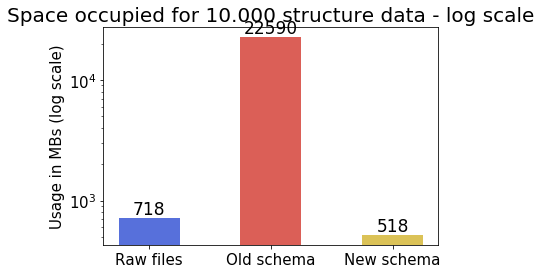

In [7]:
###############
# Benchmark #b1
###############

# Space savings experiments performed on medium sized dataset 
# with 10k structure files provided by Leopold

# The following measurements are taken without a full vacuum on the databases.
# The Django JSONB measurements is on a database that doesn't have a GIN index on attributes and extras

# Data come from the following files:
# space_saving_tests/1.x_v2/results.txt

# Databases used:
# - aiidadb_django_eav_space_10k
# - aiidadb_django_jsonb_space_10k

axis_size = 15
val_size = 17
title_size = 20

objects = ('Raw files', 'Old schema', 'New schema')
# y_pos = np.arange(len(objects))
y_pos = [0, 0.5, 1]
performance_in_bytes = [753803264, 23687584903, 544062599]
performance_in_MB = [_/(1024*1024) for _ in performance_in_bytes]
width = 0.25
cols = sns.color_palette("hls", 8)

bar = plt.bar(y_pos, performance_in_MB, width, align='center', 
              log=True, color=[cols[5], cols[0], cols[1]])
plt.xticks(y_pos, objects, fontsize=axis_size)
plt.yticks(fontsize=axis_size)
plt.ylabel('Usage in MBs (log scale)', fontsize=axis_size)
plt.title('Space occupied for 10.000 structure data - log scale', fontsize=title_size)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, 
             '%d' % int(height), ha='center', va='bottom', fontsize=val_size)


# plt.show()
# fig = plt.figure()
# # Instead of set_figwidth(30)
# fig.set_size_inches(10, fig.get_figheight(), forward=True)

plt.savefig("space_v1_10k.svg")
# plt.savefig("space.pdf")

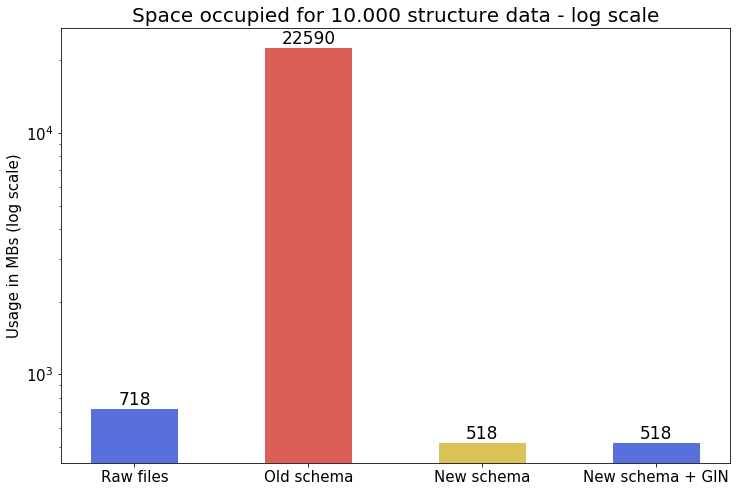

In [9]:
###############
# Benchmark #b2
###############

# Space savings experiments performed on medium sized dataset 
# with 10k structure files provided by Leopold

# The following measurements are taken after a full vacuum on the databases.
# For the Django JSONB measurements that are on a database with GIN index, GIN indexes
# were added manually on the db_dbnode table on the attributes & extras.

# Data come from the following files:
# space_saving_tests/1.x_v2/results.txt

# Databases used:
# - aiidadb_django_eav_space_10k
# - aiidadb_django_jsonb_space_10k
# - aiidadb_django_jsonb_space_10k_copy_gin

axis_size = 15
val_size = 17
title_size = 20

objects = ('Raw files', 'Old schema', 'New schema', 'New schema + GIN')
# y_pos = np.arange(len(objects))
y_pos = [0, 0.5, 1, 1.5]
performance_in_bytes = [753803264, 19266256007, 456719495, 2625641607]
performance_in_MB = [_/(1024*1024) for _ in performance_in_bytes]
width = 0.25
cols = sns.color_palette("hls", 8)

bar = plt.bar(y_pos, performance_in_MB, width, align='center', 
              log=True, color=[cols[5], cols[0], cols[1]])
plt.xticks(y_pos, objects, fontsize=axis_size)
plt.yticks(fontsize=axis_size)
plt.ylabel('Usage in MBs (log scale)', fontsize=axis_size)
plt.title('Space occupied for 10.000 structure data - log scale', fontsize=title_size)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, 
             '%d' % int(height), ha='center', va='bottom', fontsize=val_size)

fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.savefig("space_v1_10k_with_gin.svg")